In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#更改檔案路徑
os.chdir('C:\\Users\\ASUS\\Desktop\\data science\\data')

#讀檔案
data = pd.read_csv('cdata.csv')

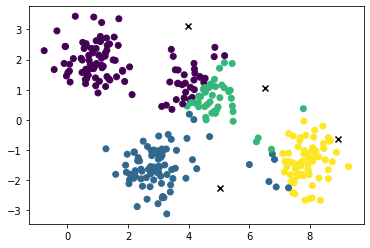

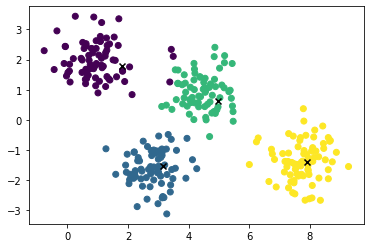

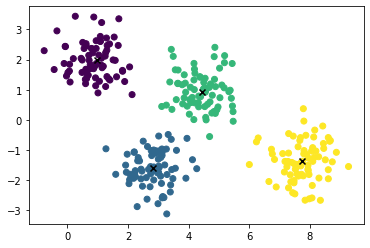

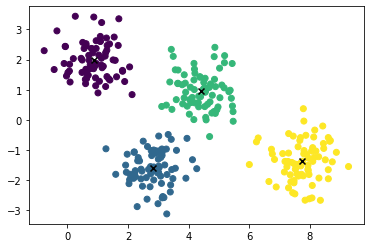

In [2]:
###(1)

#先把老師給的那行cluster刪掉
data = pd.read_csv('cdata.csv').drop(columns = 'cluster')

#隨機選取4點當作中心點
x=[]
y=[]
for i in range(4):
    x.append(np.random.uniform(data['x'].min(),data['x'].max()))
    y.append(np.random.uniform(data['y'].min(),data['y'].max()))
xy =pd.DataFrame({'x':x,
                 'y':y})
while True:    
    cluster = []
    for i in range(data.shape[0]):
        point = data.iloc[i]
        distance = []
        for j in range(xy.shape[0]):
            #計算各點與中心點的距離
            distance.append((((point-xy.iloc[j])**2).sum())**0.5)
        for k in range(4):
            #分類
            if distance[k] == min(distance):
                cluster.append(k)

    #在資料最後一行加上屬於的族群
    data['cluster']=cluster

    #畫圖
    plt.scatter(data['x'],data['y'],c=data['cluster'])
    plt.scatter(xy['x'],xy['y'],marker='x',c='black')
    
    plt.show()
    if ((xy ==  data.groupby(['cluster']).mean()).all()).all():
        break
    #更新中心點
    xy = data.groupby(['cluster']).mean()

In [6]:
###(2)#####寫到一半QQ


#先把老師給的那行cluster刪掉
data = pd.read_csv('cdata.csv').drop(columns = 'cluster')

#隨機選取4點當作中心點
x=[]
y=[]
SSE=[]
for i in range(4):
    x.append(np.random.uniform(data['x'].min(),data['x'].max()))
    y.append(np.random.uniform(data['y'].min(),data['y'].max()))
xy =pd.DataFrame({'x':x,
                 'y':y})

for r in range(10):    
    r = r+2
    sum_distance=0
    while True:    
        cluster = []
        for i in range(data.shape[0]):
            point = data.iloc[i]
            distance=[]
            for j in range(xy.shape[0]):
                #計算各點與中心點的距離
                distance.append((((point-xy.iloc[j])**2).sum())**0.5)
               

            for k in range(4):
                #分類
                if distance[k] == min(distance):
                    cluster.append(k)
                    sum_distance+=distance[k]
            print(sum_distance)

        #在資料最後一行加上屬於的族群
        data['cluster']=cluster
        
        
        if ((xy ==  data.groupby(['cluster']).mean()).all()).all():
                break
        
        #更新中心點
        xy = data.groupby(['cluster']).mean()
        




1.9504217572556846
2.454480642453094
4.7162535101396745
5.635318125446089
7.422633332219829
10.563292068938663
11.243165614961187
12.779995123990236
14.61803279982179
16.435313502217266
18.113036247748415
20.116088452865718
21.85932264489265
22.825281552278625
25.021002864429253
27.136133508074273
29.02129335607819
31.758295076668873
33.74954480500943
34.822362148059725
36.79141480386148
38.95157125276117
41.43147085859551
43.2696665480209
44.85044637690028
47.192461320551885
49.61052830723287
51.972090319416594
53.932708951686685
56.32309800779148
57.52950617808148
58.44251373543386
59.54227893421889
59.75097933274152
60.83284031610911
62.09742365523877
63.03364234707539
64.75566222355118
66.3639974020329
68.7226138091974
70.53211759064368
71.66909753709707
73.5642401071479
74.8869932967457
76.25711708124918
77.89458855524066
79.0742298144908
80.68754781794385
81.36360001422571
83.15382844899429
85.57504206469028
88.19500504124883
88.97559535251527
91.37680260855188
92.74763064332082
